In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's find the correlation between individuals health statuses who do/don't have cardiovascular disease with a side-by-side barchart.

In [66]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [67]:
df['overweight'] = (df['weight'] * 0.45359237) / ((df['height'] / 100) ** 2) # creating a new column for 'overweight' that uses BMI formula
df['overweight'] = df['overweight'].apply(lambda x: 0 if x <= 25 else 1) # if BMI is <= 25, we record it as 0, otherwise gets marked as 1 in column
df_overweight = df # machine learning technique (linear regression)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0


In [68]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1) # we use lambda function to set cholesterol to be 0 or 1 based on conditions
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1) # same method with gluc column
df # prepping for data visualization

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [69]:
prep_df = df[['id', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]
long = pd.melt(prep_df, id_vars = 'id', var_name='variable', value_name='value')
long # changed into long data frame from wide using the columns we groomed

,id,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,2,cholesterol,1
3,3,cholesterol,0
4,4,cholesterol,0
...,...,...,...
419995,99993,overweight,0
419996,99995,overweight,0
419997,99996,overweight,0
419998,99998,overweight,0


In [70]:
cardio = df[['id', 'cardio']]
long = long.merge(cardio, on='id', how='left')
long # we use same long data set and have cardio values merged to another column

,id,variable,value,cardio
0,0,cholesterol,0,0
1,1,cholesterol,1,1
2,2,cholesterol,1,1
3,3,cholesterol,0,1
4,4,cholesterol,0,0
...,...,...,...,...
419995,99993,overweight,0,0
419996,99995,overweight,0,1
419997,99996,overweight,0,1
419998,99998,overweight,0,1


In [71]:
long['value'] = long['value'].astype(str) # got an error code about int64 object having no attribute of 'startswith'

Compares the (True/False) values for chol, gluc, smoke, alco, active, and overweight for no cardiovascular disease and cardiovascular disease being present.

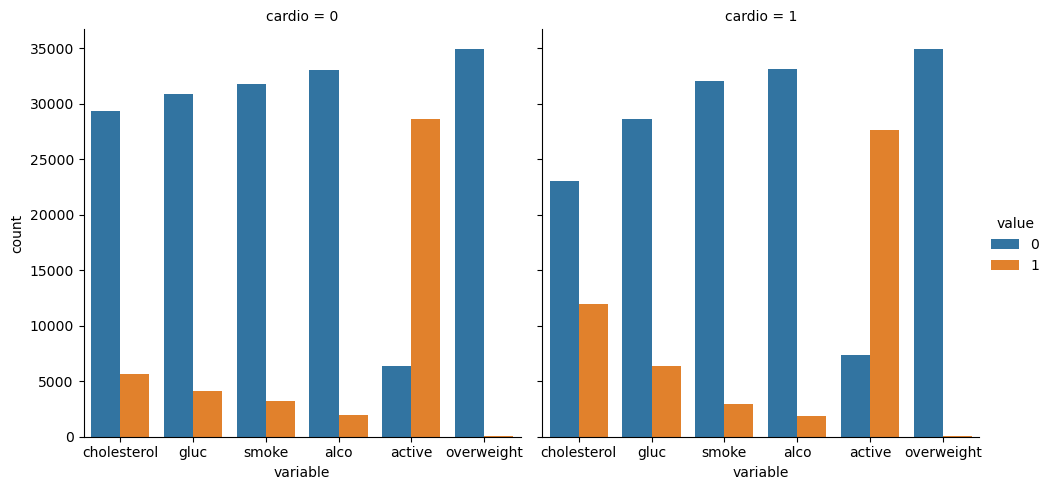

In [72]:
sns.catplot(kind = 'count', data = long, x = 'variable', hue = 'value', col = 'cardio')

Now, let's make a correlation matrix of all the values for further analysis

In [73]:
df_overweight # beginning to further clean the data cleaning data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


In [83]:
df_overweight = df_overweight[df_overweight['ap_hi'] <= df_overweight['ap_lo']] # dialstolic pressure shouldn't be higher than systolic, diastolic is min bp, systolic is max bp
df_overweight

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,0
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,0
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,0
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,0
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,0


In [95]:
corr = df_overweight.corr().iloc[2:, 2:] # getting rid of more illegible numbers in correlation data set (age, id)
corr # finds the correlations of all values

,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
sex,1.000000,0.538630,0.111375,0.030650,0.025902,0.004111,0.014115,0.306563,0.156048,-0.007483,0.001628,-0.046807
height,0.538630,1.000000,0.289203,-0.014844,0.038908,-0.016725,-0.012822,0.183230,0.092794,0.032531,-0.033741,-0.174912
weight,0.111375,0.289203,1.000000,0.198791,0.017934,0.127757,0.097684,0.088987,0.032356,0.015958,0.138500,0.216850
ap_hi,0.030650,-0.014844,0.198791,1.000000,0.333280,0.165425,0.068094,0.059450,-0.002551,0.072363,0.350910,-0.004556
ap_lo,0.025902,0.038908,0.017934,0.333280,1.000000,0.020698,0.012274,-0.000765,0.000759,0.017409,0.046534,-0.007997
cholesterol,0.004111,-0.016725,0.127757,0.165425,0.020698,1.000000,0.430526,0.024213,0.066771,0.061830,0.137285,-0.010713
gluc,0.014115,-0.012822,0.097684,0.068094,0.012274,0.430526,1.000000,0.045027,0.063194,0.057654,0.024453,-0.027245
smoke,0.306563,0.183230,0.088987,0.059450,-0.000765,0.024213,0.045027,1.000000,0.321827,0.054387,0.002825,-0.019198
alco,0.156048,0.092794,0.032356,-0.002551,0.000759,0.066771,0.063194,0.321827,1.000000,0.065901,0.004844,-0.016535
active,-0.007483,0.032531,0.015958,0.072363,0.017409,0.061830,0.057654,0.054387,0.065901,1.000000,0.047411,-0.010173


In [96]:
mask = np.triu(np.ones_like(corr, dtype=bool))

Heatmap with mask

<Axes: >

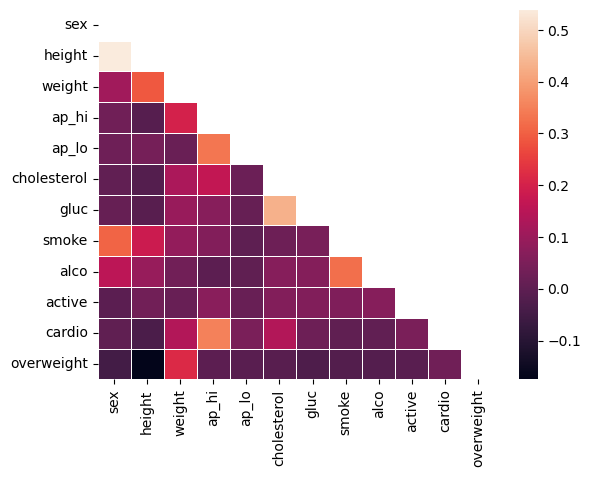

In [98]:
sns.heatmap(corr, fmt=".1f", linewidths=.5, mask=mask) # mask upper triangle, 

Heatmap without mask

<Axes: >

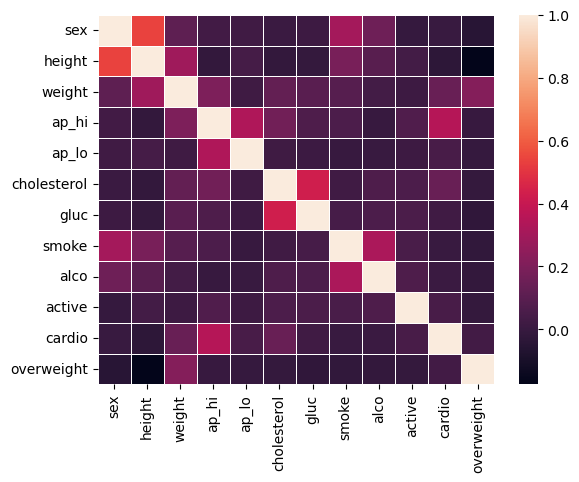

In [99]:
sns.heatmap(corr, fmt=".1f", linewidths=.5)